In [1]:
%run ./odr.ipynb
%run ./arr2table_v3.ipynb
h_lit=6.62607015*10**-34 #https://physics.nist.gov/cgi-bin/cuu/Value?h
e_lit=1.602176634*10**-19#https://physics.nist.gov/cgi-bin/cuu/Value?e
c_lit=299792458#https://physics.nist.gov/cgi-bin/cuu/Value?c

ge=5.18672*10**14
gr=5.48996*10**14
b=6.87858*10**14
v=7.40858*10**14
uv=8.20264*10**14

x=np.array([uv,v,b,gr,ge],dtype='float64')
x2=np.concatenate((x,x),axis=None)

In [2]:
def gmw(val,err):
    #entfernt alle NaN werte aus val und die entsprechenden err werte
    nanind=np.argwhere(np.isnan(val))
    val = np.delete(val, nanind)
    err = np.delete(err, nanind)
    wgt=1/err**2
    m=np.dot(val,wgt)/np.sum(wgt)
    o=np.sqrt(np.dot(wgt,err**2)/(np.sum(wgt)-1))
    return m,o

# Messreihe 1

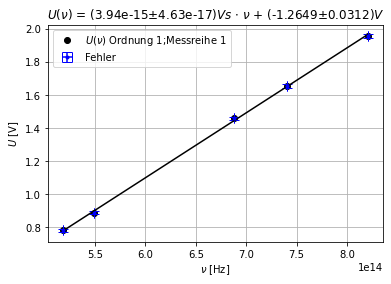

6.308645723156421e-34
1.2648914452244224


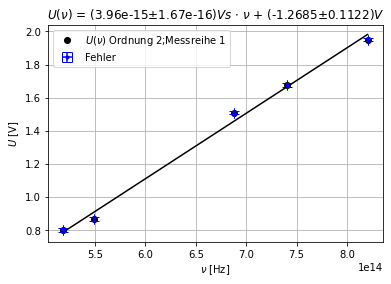

6.3486935325889555e-34
1.2684719500501827


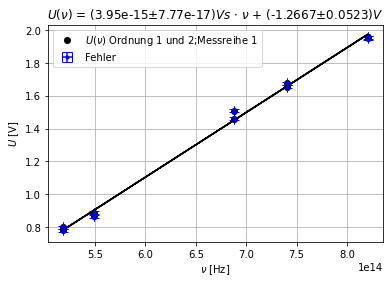

6.328669677130421e-34
Beta: [ 3.95004492e-15 -1.26668172e+00]
Beta Std Error: [7.76811183e-17 5.22865977e-02]
Beta Covariance: [[ 7.66416102e-34 -5.08386459e-19]
 [-5.08386459e-19  3.47227768e-04]]
Residual Variance: 7.873472546550226
Inverse Condition #: 0.08248884219534862
Reason(s) for Halting:
  Sum of squares convergence


In [3]:
ord1_1=np.array([1.956,1.654,1.459,0.887,0.779])
ord2_1=np.array([1.951,1.676,1.508,0.866,0.799])

y_fehler=2*0.005
y_err=np.full(len(x),y_fehler)

#ord1_1:
out11=zeichnen(x=x,y=ord1_1,y_err=y_err,xlabel="$\\nu$ [Hz]",ylabel="$U$ [V]",fx_title="$U(\\nu)$", x_title="$\\nu$",m_unit="$Vs$",b_unit="$V$",scientific=[2,0],beta0=[h_lit/e_lit,-3.0],save=True,
             label="$U(\\nu)$ Ordnung 1;Messreihe 1", 
             speichername="h_ord1_1")

h_ord1_1=out11.beta[0]*e_lit
h_ord1_1_err=out11.sd_beta[0]*e_lit
h_ord1_1_wgt=1/(h_ord1_1_err**2)
print(h_ord1_1)

phi_ord1_1=-out11.beta[1]
phi_ord1_1_err=out11.sd_beta[1]
print(phi_ord1_1)

#ord2_1:
out21=zeichnen(x=x,y=ord2_1,y_err=y_err,xlabel="$\\nu$ [Hz]",ylabel="$U$ [V]",fx_title="$U(\\nu)$", x_title="$\\nu$",m_unit="$Vs$",b_unit="$V$",scientific=[2,0],beta0=[h_lit/e_lit,-3.0],save=True,
             label="$U(\\nu)$ Ordnung 2;Messreihe 1", 
             speichername="h_ord2_1")

h_ord2_1=out21.beta[0]*e_lit
h_ord2_1_err=out21.sd_beta[0]*e_lit
h_ord2_1_wgt=1/(h_ord2_1_err**2)
print(h_ord2_1)

phi_ord2_1=-out21.beta[1]
phi_ord2_1_err=out21.sd_beta[1]
print(phi_ord2_1)

ord12_1=np.concatenate((ord1_1,ord2_1),axis=None)
y_err=np.full(len(x2),y_fehler)

#ord12_1:
out1=zeichnen(x=x2,y=ord12_1,y_err=y_err,xlabel="$\\nu$ [Hz]",ylabel="$U$ [V]",fx_title="$U(\\nu)$", x_title="$\\nu$",m_unit="$Vs$",b_unit="$V$",scientific=[2,0],beta0=[h_lit/e_lit,-3.0],save=True,
             label="$U(\\nu)$ Ordnung 1 und 2;Messreihe 1", 
             speichername="h_ord12_1")

h_ord12_1=out1.beta[0]*e_lit

print(h_ord12_1)
out1.pprint()

In [4]:
%run ./arr2table_v3.ipynb
align='c'
#["a","a","a","a"]
head=np.array(["$\\nu$ [$10^{-14}$Hz]","Ord 1 U [V]","Ord 2 U [V]"])
val=np.array([["a","a","a","a","a"],ord1_1,ord2_1])
err=np.array([np.array([0]),np.full(len(x),y_fehler),np.full(len(x),y_fehler)],dtype=object)
cap="1 Messreihe"
lab="1Mess"
nk=np.array([4])
t1=table(align,head,val,err,cap,lab,nk,longtable=False)
print(t1)

\begin{table}[H] 
\centering 
\caption{1 Messreihe} 
\begin{tabular}{c|c|c|c|c} 
$\nu$ [$10^{-14}$Hz]	 &Ord 1 U [V]	 &Ord 2 U [V]	 \\\hline
a	&1.956$\pm$0.0100	&1.951$\pm$0.0100	\\ 
a	&1.654$\pm$0.0100	&1.676$\pm$0.0100	\\ 
a	&1.459$\pm$0.0100	&1.508$\pm$0.0100	\\ 
a	&0.887$\pm$0.0100	&0.866$\pm$0.0100	\\ 
a	&0.779$\pm$0.0100	&0.799$\pm$0.0100	
\label{Tab:1Mess} 
\end{tabular} 
\end{table}


In [5]:
print("Mittelwert aus ord1/2")
print((h_ord1_1+h_ord2_1)/2)
print("\nWert aus plot ord1/2")
print(h_ord12_1)

print("\ngewichteter Mittelwert aus ord1/2")
gmw1=(h_ord1_1*h_ord1_1_wgt+h_ord2_1*h_ord2_1_wgt)/(h_ord1_1_wgt+h_ord2_1_wgt)
gmw1_err=np.sqrt((h_ord1_1_wgt*h_ord1_1_err**2+h_ord2_1_wgt*h_ord2_1_err**2)/((h_ord1_1_wgt+h_ord2_1_wgt)-1))
gmw1_wgt=1/gmw1_err**2
print(gmw1)
print(gmw1_err)

print("\ngewichteter Mittelwert von Phi:")
[p_gmw1,p_gmw1_err]=gmw(np.array([phi_ord1_1,phi_ord2_1]),np.array([phi_ord1_1_err,phi_ord2_1_err]))
print(p_gmw1)
print(p_gmw1_err)

Mittelwert aus ord1/2
6.328669627872688e-34

Wert aus plot ord1/2
6.328669677130421e-34

gewichteter Mittelwert aus ord1/2
6.311513124791047e-34
1.0104885539387038e-35

gewichteter Mittelwert von Phi:
1.265147807440536
0.042470921614310285


# Messreihe 2

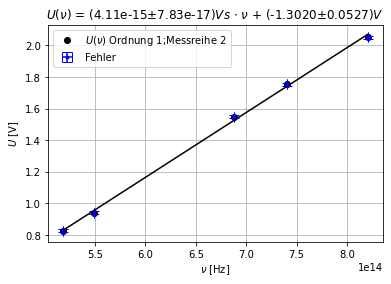

6.585130604334841e-34
1.3019611001329452


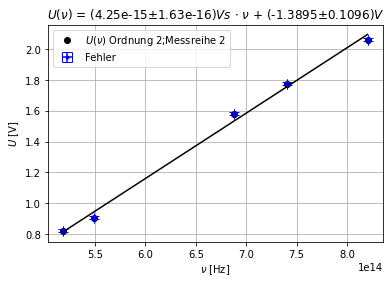

6.806632901870909e-34
1.3894669852411456


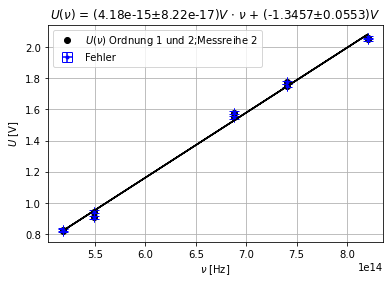

6.695881753102873e-34
Beta: [ 4.17924067e-15 -1.34571404e+00]
Beta Std Error: [8.22154009e-17 5.53385992e-02]
Beta Covariance: [[ 7.66415784e-34 -5.08386326e-19]
 [-5.08386326e-19  3.47227733e-04]]
Residual Variance: 8.819458434485226
Inverse Condition #: 0.08248884295592093
Reason(s) for Halting:
  Sum of squares convergence


In [6]:
ord1_2=np.array([2.050,1.753,1.549,0.942,0.828])
ord2_2=np.array([2.060,1.775,1.580,0.906,0.822])

y_err=np.full(len(x),y_fehler)

#ord1_2:
out11=zeichnen(x=x,y=ord1_2,y_err=y_err,xlabel="$\\nu$ [Hz]",ylabel="$U$ [V]",fx_title="$U(\\nu)$", x_title="$\\nu$",m_unit="$Vs$",b_unit="$V$",scientific=[2,0],beta0=[h_lit/e_lit,-3.0],save=True,
             label="$U(\\nu)$ Ordnung 1;Messreihe 2", 
             speichername="h_ord1_2")

h_ord1_2=out11.beta[0]*e_lit
h_ord1_2_err=out11.sd_beta[0]*e_lit
h_ord1_2_wgt=1/(h_ord1_2_err**2)
print(h_ord1_2)

phi_ord1_2=-out11.beta[1]
phi_ord1_2_err=out11.sd_beta[1]
print(phi_ord1_2)

#ord2_2:
out21=zeichnen(x=x,y=ord2_2,y_err=y_err,xlabel="$\\nu$ [Hz]",ylabel="$U$ [V]",fx_title="$U(\\nu)$", x_title="$\\nu$",m_unit="$Vs$",b_unit="$V$",scientific=[2,0],beta0=[h_lit/e_lit,-3.0],save=True,
             label="$U(\\nu)$ Ordnung 2;Messreihe 2", 
             speichername="h_ord2_2")

h_ord2_2=out21.beta[0]*e_lit
h_ord2_2_err=out21.sd_beta[0]*e_lit
h_ord2_2_wgt=1/(h_ord2_2_err**2)
print(h_ord2_2)

phi_ord2_2=-out21.beta[1]
phi_ord2_2_err=out21.sd_beta[1]
print(phi_ord2_2)

ord12_2=np.concatenate((ord1_2,ord2_2),axis=None)
y_err=np.full(len(x2),y_fehler)

#ord12_2:
out2=zeichnen(x=x2,y=ord12_2,y_err=y_err,xlabel="$\\nu$ [Hz]",ylabel="$U$ [V]",fx_title="$U(\\nu)$", x_title="$\\nu$",m_unit="$V$",b_unit="$V$",scientific=[2,0],beta0=[h_lit/e_lit,-3.0],save=True,
             label="$U(\\nu)$ Ordnung 1 und 2;Messreihe 2", 
             speichername="h_ord12_2")
h_ord12_2=out2.beta[0]*e_lit
print(out2.beta[0]*e_lit)
out2.pprint()

In [21]:

align2='c'
head2=np.array(["$\\nu$ [$10^{-14}$Hz]","Ord 1 U [V]","Ord 2 U [V]"])
val2=np.array([x*(10**(-14)),ord1_2,ord2_2])
err2=np.array([np.array([0]),np.full(len(x),y_fehler),np.full(len(x),y_fehler)])
cap2="2 Messreihe"
lab2="2Mess"
nk2=np.array([4])
t2=table(align2,head2,val2,err2,cap2,lab2,nk2)
print(t2)

\begin{longtable}{c|c|c} 
 
\caption{2 Messreihe}\\ 
 
$\nu$ [$10^{-14}$Hz]	 &Ord 1 U [V]	 &Ord 2 U [V]	 \\\hline\hline
\endfirsthead 
 
\caption{Fortsetzung 2 Messreihe}\\ 
 
$\nu$ [$10^{-14}$Hz]	 &Ord 1 U [V]	 &Ord 2 U [V]	 \\\hline\hline
\endhead
\hline
\multicolumn{4}{r}{Weiter auf der n{"a}chsten Seite}\
\endfoot\hline
\multicolumn{4}{r}{Ende} \
\endlastfoot
 
8.2026	&2.0500$\pm$0.0100	&2.0600$\pm$0.0100	\\ 
7.4086	&1.7530$\pm$0.0100	&1.7750$\pm$0.0100	\\ 
6.8786	&1.5490$\pm$0.0100	&1.5800$\pm$0.0100	\\ 
5.4900	&0.9420$\pm$0.0100	&0.9060$\pm$0.0100	\\ 
5.1867	&0.8280$\pm$0.0100	&0.8220$\pm$0.0100	
\label{tab:2Mess} 
 
\end{longtable}


<ipython-input-21-826d7e8de3d4>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  err2=np.array([np.array([0]),np.full(len(x),y_fehler),np.full(len(x),y_fehler)])


In [22]:
print("Mittelwert aus ord1/2")
print((h_ord1_2+h_ord2_2)/2)
print("\nWert aus plot ord1/2")
print(h_ord12_2)

print("\ngewichteter Mittelwert aus ord1/2")
gmw2=(h_ord1_2*1/(h_ord1_2_err**2)+h_ord2_2*1/(h_ord2_2_err**2))/(1/(h_ord1_2_err**2)+1/(h_ord2_2_err**2))
print(gmw2)
gmw2_err=np.sqrt((h_ord1_2_wgt*h_ord1_2_err**2+h_ord2_2_wgt*h_ord2_2_err**2)/((h_ord1_2_wgt+h_ord2_2_wgt)-1))
gmw2_wgt=1/gmw2_err**2
print(gmw2_err)

print("\ngewichteter Mittelwert von Phi/e:")
[p_gmw2,p_gmw2_err]=gmw(np.array([phi_ord1_2,phi_ord2_2]),np.array([phi_ord1_2_err,phi_ord2_2_err]))
print(p_gmw2)
print(p_gmw2_err)

Mittelwert aus ord1/2
6.695881753102875e-34

Wert aus plot ord1/2
6.695881753102873e-34

gewichteter Mittelwert aus ord1/2
6.626769565296708e-34
1.5993289923361463e-35

gewichteter Mittelwert von Phi/e:
1.3184108369714604
0.06726560562624916


# h Final

In [9]:
h_final=(gmw1*gmw1_wgt+gmw2*gmw2_wgt)/(gmw1_wgt+gmw2_wgt)
h_final_err=np.sqrt((gmw1_wgt*gmw1_err**2+gmw2_wgt*gmw2_err**2)/((gmw2_wgt+gmw2_wgt)-1))
print(h_final)
print(h_final_err)
(h_lit/h_final-1)*100

6.401457147118838e-34
1.5993289923361463e-35


3.5087792938246265

# $W_0/e$ Final

In [10]:
[p_final,p_final_err]=gmw(np.array([p_gmw1,p_gmw2]),np.array([p_gmw1_err,p_gmw2_err]))
print(p_final)
print(p_final_err)

1.280329231373347
0.05081964199502806


# Stoppspannung und Intensität


In [11]:
uv_ss=np.array([2.11,2.11,2.11,2.10,2.09])
v_ss=np.array([1.795,1.794,1.787,1.785,1.785])
xp=np.array([1,0.8,0.6,0.4,0.2])*100

uv_ss_fehler=20*0.005
uv_ss_err=np.full(len(xp),uv_ss_fehler)
v_ss_fehler=2*0.005
v_ss_err=np.full(len(xp),v_ss_fehler)

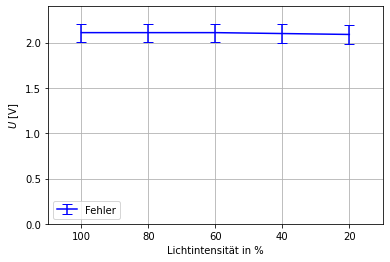

In [12]:
plt.errorbar(xp, uv_ss, yerr=uv_ss_err, color="b", label="Fehler",capsize=5)
plt.ylim(0,2.4)
plt.xlim(110,10)
plt.grid()
plt.legend()
plt.xlabel("Lichtintensität in %")
plt.ylabel("$U$ [V]")
plt.savefig("int_uv",dpi=300)
plt.show()

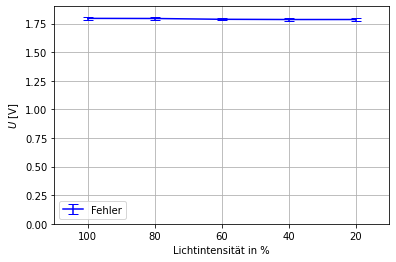

In [13]:
plt.errorbar(xp, v_ss, yerr=v_ss_err, color="b", label="Fehler",capsize=5)
plt.ylim(0,1.9)
plt.xlim(110,10)
plt.grid()
plt.legend()
plt.xlabel("Lichtintensität in %")
plt.ylabel("$U$ [V]")
plt.savefig("int_v",dpi=300)
plt.show()

In [14]:

align='c'
head=np.array(["Lichtintensität in \%","Ultraviolett","Violett"])
val=np.array([xp,uv_ss,v_ss])
err=np.array([np.array([0]),uv_ss_err,v_ss_err])
cap="Stoppspannung und Intensität"
lab="ss_int"
nk=np.array([4])
t1=table(align,head,val,err,cap,lab,nk)
print(t1)

\begin{longtable}{c|c|c|c|c} 
 
\caption{Stoppspannung und Intensität}\\ 
 
Lichtintensität in \%	 &Ultraviolett	 &Violett	 \\\hline\hline
\endfirsthead 
 
\caption{Fortsetzung Stoppspannung und Intensität}\\ 
 
Lichtintensität in \%	 &Ultraviolett	 &Violett	 \\\hline\hline
\endhead
\hline
\multicolumn{4}{r}{Weiter auf der n{"a}chsten Seite}\
\endfoot\hline
\multicolumn{4}{r}{Ende} \
\endlastfoot
 
100.0000	&2.1100$\pm$0.1000	&1.7950$\pm$0.0100	\\ 
80.0000	&2.1100$\pm$0.1000	&1.7940$\pm$0.0100	\\ 
60.0000	&2.1100$\pm$0.1000	&1.7870$\pm$0.0100	\\ 
40.0000	&2.1000$\pm$0.1000	&1.7850$\pm$0.0100	\\ 
20.0000	&2.0900$\pm$0.1000	&1.7850$\pm$0.0100	
\label{tab:ss_int} 
 
\end{longtable}


<ipython-input-14-03ab1941ca0a>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  err=np.array([np.array([0]),uv_ss_err,v_ss_err])


# LED 

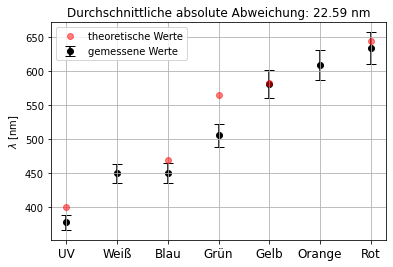

In [15]:
w_theo=np.nan
o_theo=np.nan

ge_theo=583*10**-9
b_theo=470*10**-9
gr_theo=565*10**-9
r_theo=645*10**-9
uv_theo=400*10**-9
l_theo=np.array([uv_theo,np.nan,b_theo,gr_theo,ge_theo,np.nan,r_theo])

#uv,weiß,blau,grün,gelb,orange,rot
ss=np.array([1.886,1.381,1.377,1.086,0.782,0.686,0.609])
ss_err=np.full(len(ss),y_fehler)

f=(ss+p_final)*e_lit/h_final
f_err=np.sqrt((e_lit*ss_err/h_final)**2+(e_lit*p_final_err/h_final)**2+(e_lit*(p_final+ss)*h_final_err/h_final**2)**2)
l=c_lit/f
l_err=c_lit*f_err/f**2
ldiff=(l-l_theo)*10**9
lmean=np.nanmean(np.abs(ldiff))


xn=np.arange(1,len(ss)+1,1)
fig, ax = plt.subplots(1,1) 

ax.errorbar(xn, l*10**9, yerr=l_err*10**9,fmt="o" , color="k", label="gemessene Werte",capsize=5,zorder=1)
ax.plot(xn,l_theo*10**9,'ro',label="theoretische Werte",alpha=0.5,zorder=2)

ax.set_xticks(xn)
x_ticks_labels = ['UV','Weiß','Blau','Grün','Gelb','Orange','Rot']
ax.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=12)

plt.ylabel("$\lambda$ [nm]")
plt.legend()
plt.title("Durchschnittliche absolute Abweichung: {:.2f}".format(lmean)+" nm")
plt.grid()
plt.savefig("led",dpi=300)

In [16]:
%run ./arr2table_v2.ipynb
align='c'
head=np.array(["Stoppspannung [V]","$\lambda_{mess}$ [nm]","$\lambda_{theo}$ [nm]"])
val=np.array([np.full(len(l),np.nan),l*10**9,l_theo*10**9])
err=np.array([np.full(len(l),0),l_err*10**9,np.array([0])])
cap="Stoppspannung und Intensität"
lab="ss_int"
nk=np.array([4])
t1=table(align,head,val,err,cap,lab,nk)
print(t1)

\begin{longtable}{c|c|c} 
 
\caption{Stoppspannung und Intensität}\\ 
 
Stoppspannung [V]	 &$\lambda_{mess}$ [nm]	 &$\lambda_{theo}$ [nm]	 \\\hline\hline
\endfirsthead 
 
\caption{Fortsetzung Stoppspannung und Intensität}\\ 
 
Stoppspannung [V]	 &$\lambda_{mess}$ [nm]	 &$\lambda_{theo}$ [nm]	 \\\hline\hline
\endhead
\hline
\multicolumn{4}{r}{Weiter auf der n{"a}chsten Seite}\
\endfoot\hline
\multicolumn{4}{r}{Ende} \
\endlastfoot
 
nan	&378.2972$\pm$11.2969	&400.0000	\\ 
nan	&450.0809$\pm$14.2538	&nan	\\ 
nan	&450.7584$\pm$14.2834	&470.0000	\\ 
nan	&506.1905$\pm$16.8134	&565.0000	\\ 
nan	&580.8061$\pm$20.5750	&583.0000	\\ 
nan	&609.1622$\pm$22.1153	&nan	\\ 
nan	&633.9887$\pm$23.5151	&645.0000	
\label{tab:ss_int} 
 
\end{longtable}


<ipython-input-16-de3b5391ef5c>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  err=np.array([np.full(len(l),0),l_err*10**9,np.array([0])])


#  Quantenausbeute


In [17]:
#UV,V,B,Gr,Ge
A=np.array([0.39,0.61,1.36,1.2,1.72])*10**-6
#Felix A=np.array([0.4,0.7,1.6,1.36,2.30])*10**-6



A_fehler=0.05*10**-6
#Felix A_fehler=0.01*10**-6
A_err=np.full(len(A),A_fehler)
E_s_led=A*(1/e_lit)
E_s_led_err=A_err*(1/e_lit)
Qausbeute_led=np.array([6,12,20,45,55])*0.01*(88/100)
#Felix Qausbeute_led=np.array([6,10.2,20,45,55])*0.01*(88/100)
Qausbeute_led_fehler=0.025*(88/100)
Qausbeute_led_err=np.full(len(Qausbeute_led),Qausbeute_led_fehler)
P_s=E_s_led/Qausbeute_led
P_s_err=P_s_err=np.sqrt((E_s_led_err/Qausbeute_led)**2+(-E_s_led/Qausbeute_led**2*Qausbeute_led_fehler)**2)
print(P_s)

[4.61020557e+13 3.60541717e+13 4.82298428e+13 1.89136639e+13
 2.21805694e+13]


In [18]:
%run ./arr2table_v2.ipynb
align='c'
head=np.array(["Farbe","Strom [A$10^{-6}$]","Ele. Strom [1/s$*10^{-12}$]","Qausbeute","Pho. Strom [1/s$*10^{-12}$]"])
val=np.array([np.full(len(A),np.nan),A*10**6,E_s_led*10**-12,Qausbeute_led*100,P_s*10**-12])
err=np.array([np.full(len(A),np.nan),A_err*10**6,E_s_led_err*10**-12,Qausbeute_led_err*100,P_s_err*10**-12])
cap="Photodiode Ausbeute"
lab="P_s"
nk=np.array([4])
t1=table(align,head,val,err,cap,lab,nk)
print(t1)

\begin{longtable}{c|c|c|c|c} 
 
\caption{Photodiode Ausbeute}\\ 
 
Farbe	 &Strom [A$10^{-6}$]	 &Ele. Strom [1/s$*10^{-12}$]	 &Qausbeute	 &Pho. Strom [1/s$*10^{-12}$]	 \\\hline\hline
\endfirsthead 
 
\caption{Fortsetzung Photodiode Ausbeute}\\ 
 
Farbe	 &Strom [A$10^{-6}$]	 &Ele. Strom [1/s$*10^{-12}$]	 &Qausbeute	 &Pho. Strom [1/s$*10^{-12}$]	 \\\hline\hline
\endhead
\hline
\multicolumn{4}{r}{Weiter auf der n{"a}chsten Seite}\
\endfoot\hline
\multicolumn{4}{r}{Ende} \
\endlastfoot
 
nan$\pm$nan	&0.3900$\pm$0.05	&2.4342$\pm$0.3121	&5.2800$\pm$2.2	&46.1021$\pm$20.0979	\\ 
nan$\pm$nan	&0.6100$\pm$0.05	&3.8073$\pm$0.3121	&10.5600$\pm$2.2	&36.0542$\pm$8.0717	\\ 
nan$\pm$nan	&1.3600$\pm$0.05	&8.4885$\pm$0.3121	&17.6000$\pm$2.2	&48.2298$\pm$6.2841	\\ 
nan$\pm$nan	&1.2000$\pm$0.05	&7.4898$\pm$0.3121	&39.6000$\pm$2.2	&18.9137$\pm$1.3134	\\ 
nan$\pm$nan	&1.7200$\pm$0.05	&10.7354$\pm$0.3121	&48.4000$\pm$2.2	&22.1806$\pm$1.1968	
\label{tab:P_s} 
 
\end{longtable}


In [19]:
#Violett
U_0_ent=1.7726
U_inf_ent=0.4
U_halb_ent=U_0_ent-(U_0_ent-U_inf_ent)/2
t_halb_ent=7
t_halb_ent_err=1
C=t_halb_ent/(np.log(2)*10**13)
C_err=t_halb_ent_err/(np.log(2)*10**13)
#in 1s auf die hälfte der kapazität
t_halb_auf=1
t_halb_auf_err=0.5
intensität=0.1*0.2

U_inf_auf=1.55
U_0_auf=0.43
U_halb_auf=U_inf_auf-(U_inf_auf-U_0_auf)/2
U_halb_auf_err=0.1

Q=C*U_halb_auf
Q_s=Q/t_halb_auf
Q_s_err=np.sqrt((C_err*U_halb_auf/t_halb_auf)**2+(C*U_halb_auf_err/t_halb_auf)**2
                +(C*U_halb_auf*t_halb_auf_err/t_halb_auf**2)**2)
E_s=Q_s/e_lit
E_s_err=Q_s_err/e_lit
Qausbeute=E_s/P_s[1]
Qausbeute_err=np.sqrt((E_s_err/P_s[1])**2+(E_s*P_s_err[1]/P_s[1]**2)**2)
Qausbeute_int=Qausbeute/intensität
Qausbeute_int_err=Qausbeute_err/intensität
print(C)
print(C_err)
print(E_s)
print(E_s_err)
print(Qausbeute)
print(Qausbeute_err)
print(Qausbeute_int)
print(Qausbeute_int_err)
print("Lichtleistung:")
phi=h_final*P_s*x
phi_err=np.sqrt((h_final_err*P_s*x)**2+(h_final*P_s_err*x)**2)
print(phi*10**6)
print(phi_err*10**6)

1.0098865286222745e-12
1.4426950408889633e-13
6240183.773245889
3305596.8290863265
1.7307799548899518e-07
9.953604100800129e-08
8.653899774449758e-06
4.976802050400064e-06
Lichtleistung:
[24.20765854 17.09894599 21.2370154   6.64696955  7.36451817]
[10.57051346  3.85184239  2.81747532  0.49055907  0.43788602]


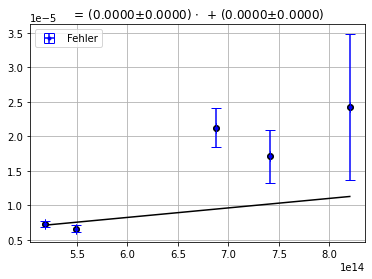

In [20]:
zeichnen(x=x,y=phi,y_err=phi_err)